In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model



In [ ]:
train_dir = '/content/drive/MyDrive/data/Train'
val_dir = '/content/drive/MyDrive/data/Validation'
test_dir = '/content/drive/MyDrive/data/Test'


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 10010 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=15,
    verbose = 1
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


KeyboardInterrupt: 

### Visualize Training History

NameError: name 'history' is not defined

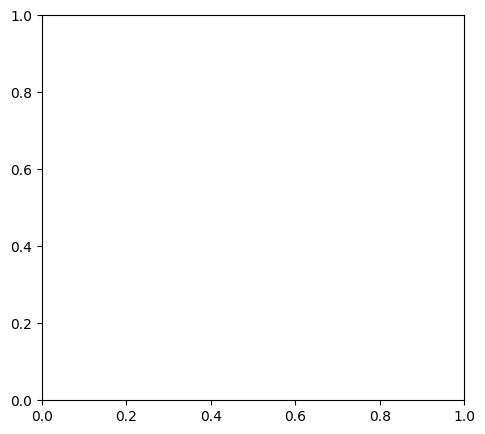

In [ ]:
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Test the model on a single image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
Prediction: Mask 😷✅
Confidence: 0.9898


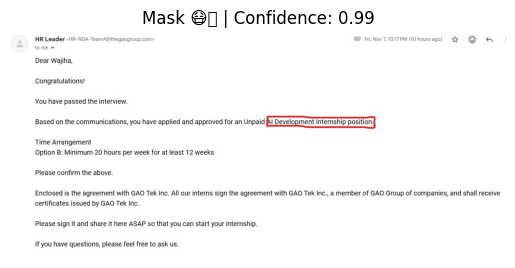

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import os

# 🔹 Load your trained Face Mask Detector model
model_path = "/content/face_detector_model.h5"   # <-- apna .h5 path yahan do
model = load_model(model_path)

def predict_masked_face(img_path, model, target_size=(128, 128)):
    # Load image
    img = image.load_img(img_path, target_size=target_size)

    # Convert to array
    img_array = image.img_to_array(img)

    # Expand dims (1, 128, 128, 3)
    img_array = np.expand_dims(img_array, axis=0)

    # Normalize
    img_array = img_array / 255.0

    # Prediction
    prediction = model.predict(img_array)

    # Binary classification logic
    if prediction[0][0] > 0.5:
        return "No Mask 😷❌", prediction[0][0]
    else:
        return "Mask 😷✅", 1 - prediction[0][0]


# 🔹 Image path
img_path_for_prediction = "/content/n.jpg"

if os.path.exists(img_path_for_prediction):
    label, prob = predict_masked_face(img_path_for_prediction, model)

    print(f"Prediction: {label}")
    print(f"Confidence: {prob:.4f}")

    # Show image
    plt.imshow(image.load_img(img_path_for_prediction))
    plt.title(f"{label} | Confidence: {prob:.2f}")
    plt.axis("off")
    plt.show()
else:
    print("❌ Image path incorrect")


/tmp/ipython-input-1523202433.py:33: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1523202433.py:33: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


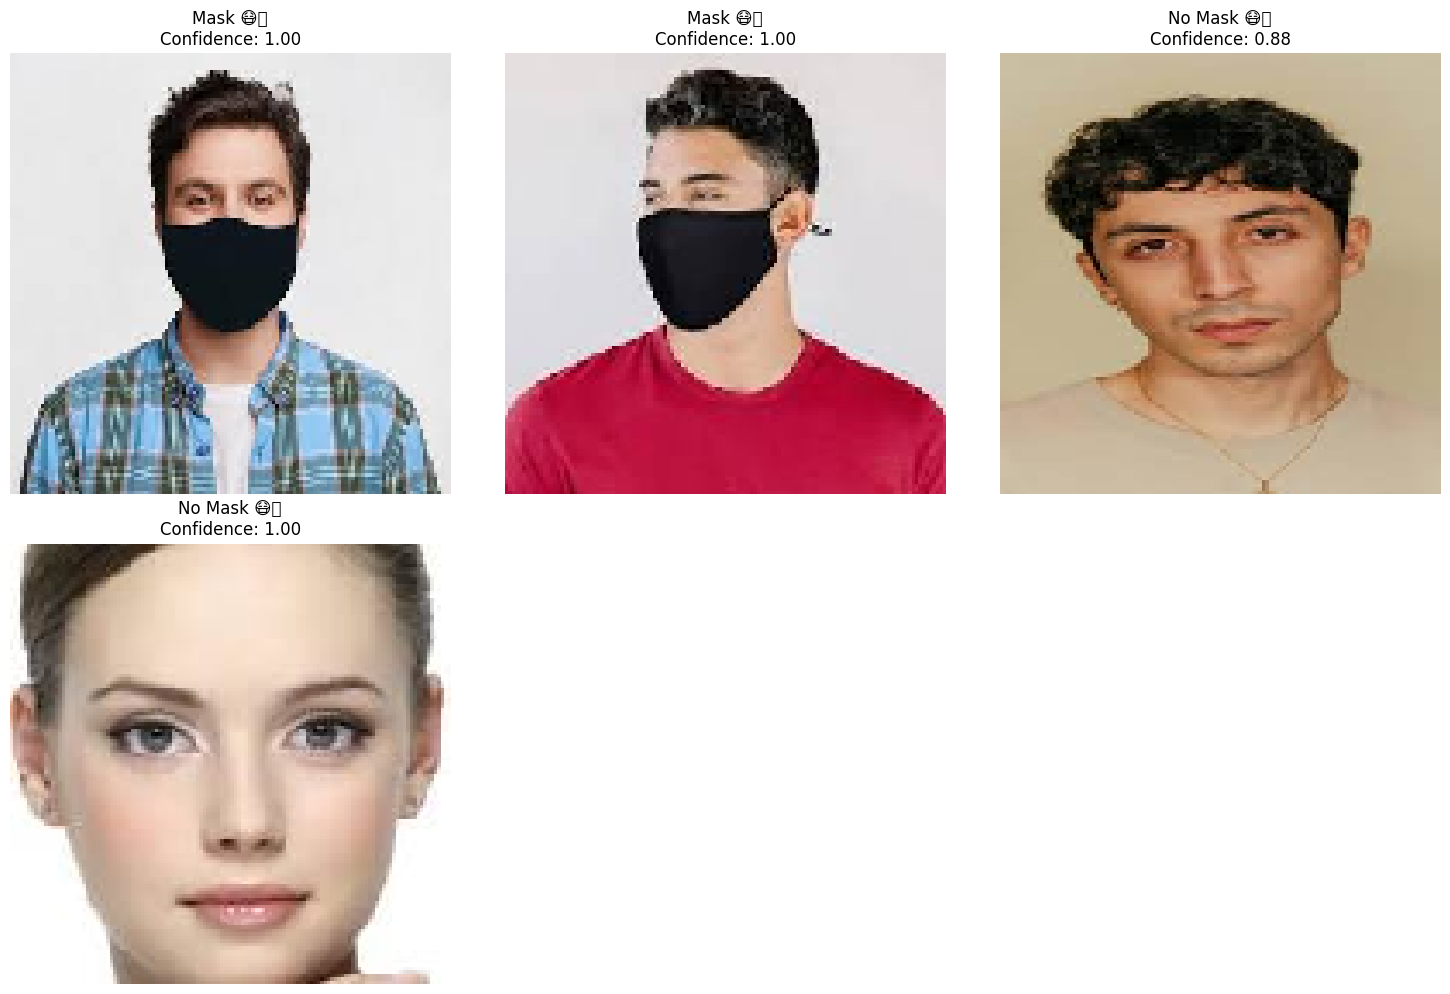

In [33]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import math

def predict_multiple_images(img_paths, model, target_size=(128, 128)):
    num_imgs = len(img_paths)
    cols = 3
    rows = math.ceil(num_imgs / cols)

    plt.figure(figsize=(15, 5 * rows))

    for i, img_path in enumerate(img_paths):
        # Load and preprocess
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        # Predict
        prediction = model.predict(img_array, verbose=0)

        if prediction[0][0] > 0.5:
            label, prob = "No Mask 😷❌", prediction[0][0]
        else:
            label, prob = "Mask 😷✅", 1 - prediction[0][0]

        # Plot
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(f"{label}\nConfidence: {prob:.2f}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Example usage with your files:
image_list = [
    '/content/w2.jfif',
    '/content/w3.jfif',
    '/content/images (1).jfif',
    '/content/images.jfif'

]

# Filter out paths that don't exist just in case
import os
existing_images = [p for p in image_list if os.path.exists(p)]

if existing_images:
    predict_multiple_images(existing_images, model)
else:
    print("No valid image paths found.")

In [ ]:
model.save("face_detector_model.h5")
